### About the Data Set:
The data set is compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic sepcturm.

Inspiration - Suicide Prevention
Source - Kaggle
The data set contains 27820 data points and 12 features from the year 1985 to 2016

country: The country of residence of the individual
year: The year the suicide happend
sex: The gender of the individual (male/female)
age group: The age group of the individual
count of suicides: The count number of suicides that happend
population: The overall population of the country
suicide rate: The number of suicides per 100,000 person
country-year composite key: A code containing the country name plus the year of the suicide
HDI for year: Human Development Index is a statistic composite index of life expectancy, education, and per capita income indicators.
gdpforyear: The GDP of the country at that year
gdppercapita: The GDP per capita of the country at that year
generation: The name of the corresponding generation

In [45]:
#Importing needed packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [46]:
#importing the data set:
df = pd.read_csv("C:\\Users\\Anuja\\OneDrive\\Desktop\\Data 603\\Suicidal_Pyspark\\master.csv")

In [47]:
print("Number of rows and columns in dataframe", df.shape)

print("\nList of column name in dataframe")
print(df.columns.to_list())

print("\nData Type associated with different columns in the dataframe:")
print(df.dtypes)



Number of rows and columns in dataframe (27820, 12)

List of column name in dataframe
['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

Data Type associated with different columns in the dataframe:
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [48]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Looking at the stastics, it is quite surprising to see, minimum number of suicide is zero. How can it be possible?

Let's examine

In [49]:
df[df["suicides_no"] ==0].head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9,Albania,1987,female,5-14 years,0,311000,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
33,Albania,1989,female,5-14 years,0,321900,0.0,Albania1989,NaN,"2,335,124,988",833,Generation X


So, the number of suicides are based on the number of suicides in particular age category. It does not represent the total number of suicides. Well, that make sense

**Data preprocessing**

**Null Values**

In [50]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

- Column "HDI for year" contains 19456 null entires. Total number of rows are 27820 out of which 19456 is null values which is 69.94 % of the total. 

Let's just select columns only necessary. We can drop the columns as well but I am creating a dataframe containing only useful columns

In [51]:
data_clean = df[['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop',' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]

**Exmaine the count of columns:**

In [52]:
data_clean.groupby("country")["country"].count().sort_values(ascending = False)

country
Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [53]:
data_clean.groupby("age")["age"].count().sort_values(ascending = False)

age
15-24 years    4642
25-34 years    4642
35-54 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [54]:
data_clean.groupby("sex")["sex"].count().sort_values(ascending = False)

sex
female    13910
male      13910
Name: sex, dtype: int64

In [55]:
data_clean.groupby("generation")["generation"].count().sort_values(ascending = False)

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Exploratory Data Analysis

**Research Question1: How does the Rate of Suicide changed over time?**

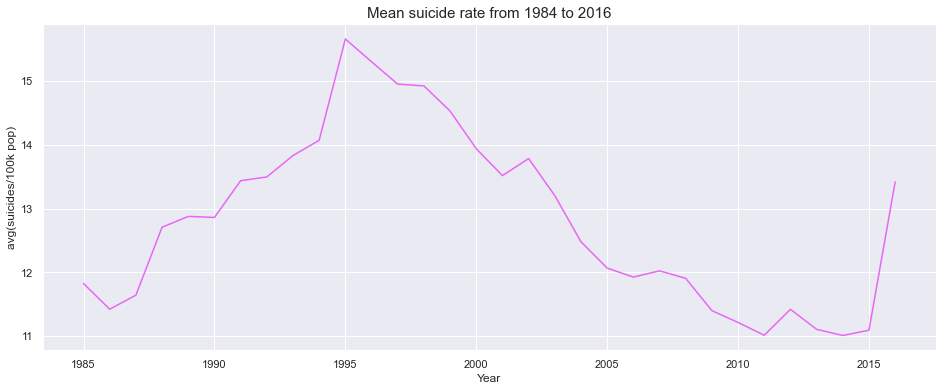

In [56]:
grouped_year = data_clean.groupby("year").mean("suicides/100k pop")
#grouped_year['year'] = pd.to_datetime(grouped_year['year'],format = '%Y')
plt.figure(figsize = (16,6))
sns.lineplot(x = 'year', y ='suicides/100k pop', data = grouped_year,color=sns.husl_palette(6)[5] )
plt.xlabel("Year",size = 12)
plt.ylabel("avg(suicides/100k pop)",size = 12)
plt.title("Mean suicide rate from 1984 to 2016",size = 15)
plt.show()

- From observing our Time Series Line Plot, we can see a sharp drop in suicides in 1985. This decrease could be due to awareness of suicide & mental health in the 80s, as well as improved recognition of those at risk. This is indeed accurate, as the research, “Suicide in the elderly” supports this claim,
- There has been increase in the number of suicides from the year 1993 to 1995. 
- Then the number starts to drop slowly too before it plummeted after 2014.
- From the year 2015, suicide rate pike with significant number.

In [57]:
data_clean.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

**Research Question 2: What is the relationship between the gender and the number of suicides?**

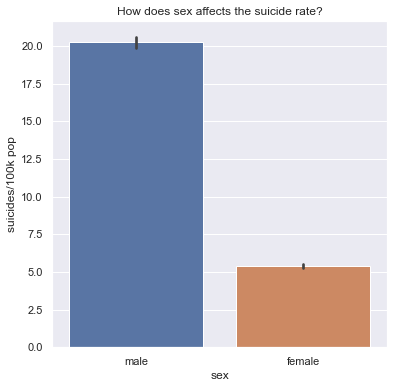

In [58]:
plt.figure(figsize = (6,6))
sns.barplot(x = "sex", y = "suicides/100k pop", data = data_clean)
plt.title("How does sex affects the suicide rate?")
plt.show()

Data show heightened differences in suicide for different sexes. It’s evident that males are more inclined to suicide. “In 2017, men died by suicide 3.54 times more often than women. Middle-aged white men, in particular, are susceptible” (SMM Health).



**Research Question 3: Which are the top 10 countries for Suicidal Rate?**

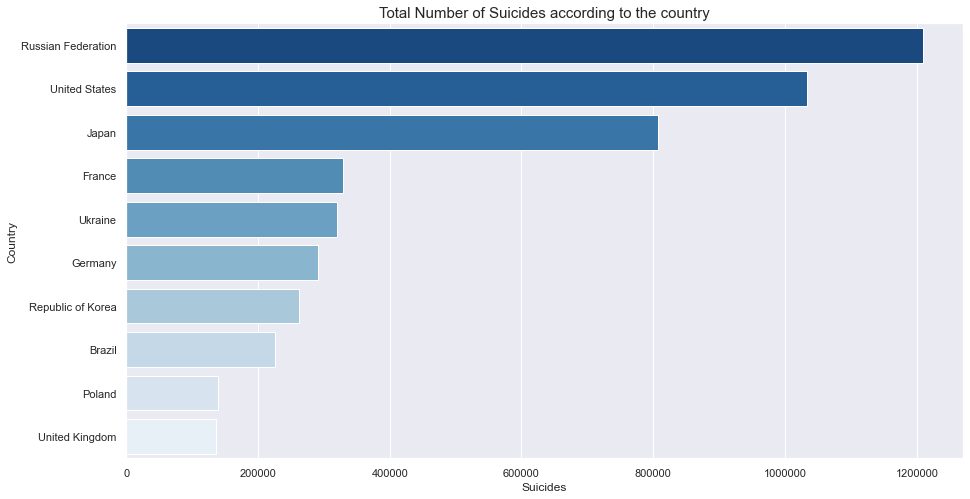

In [59]:
grouped_country = data_clean.groupby('country', as_index=False).sum()
top_ten = grouped_country.nlargest(10, 'suicides_no').sort_values('suicides_no', ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='suicides_no', y='country', palette='Blues_r', data=top_ten, ax=ax)
plt.xlabel('Suicides')
plt.ylabel('Country')
plt.title('Total Number of Suicides according to the country', size=15)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

Russia is topping our list with 1,209,742 cases followed by the United States at 1,034,013 cases then Japan.
- A reason the Russian Federations may have a large suicide count may be that they have a very large population
- It has been reported that Russian levels of alcohol consumption plays an immense role in it’s large suicide count, but their is a lack of data to support this due to Soviet secrecy.

**Research Question 4:Research Question 3: Are certain age groups more inclined to suicide?**

In [60]:
grouped_gen = data_clean.groupby('generation', as_index=False).sum().sort_values(by = 'suicides/100k pop', ascending = False)

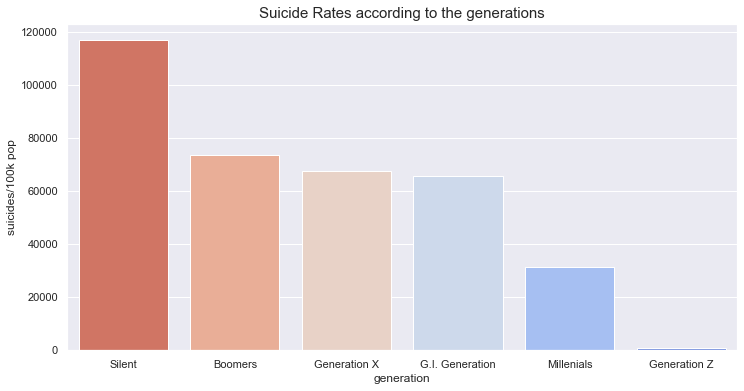

In [61]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = 'generation', y ='suicides/100k pop', data = grouped_gen, palette= 'coolwarm_r' )
plt.title("Suicide Rates according to the generations", fontsize = 15)
plt.show()

As we can see, the G.I. Generation or the Greatest Generation (the generation who lived during the WWII) has the highest suicide rate with almost 25 suicides per 100,000 person. This is a very big number compared to younger generations, this might be due to the fact that this generation suffered a lot during the WWII, many of them lost their loved ones and experienced different traumatic events. The suicide rates decrease from a generation to another, where Generation Z has the lowest suicide rates with 1 suicide per 100,000 person. Let's check the suicide rates according to the age categories.

**5. Age category vs Suicide rate**

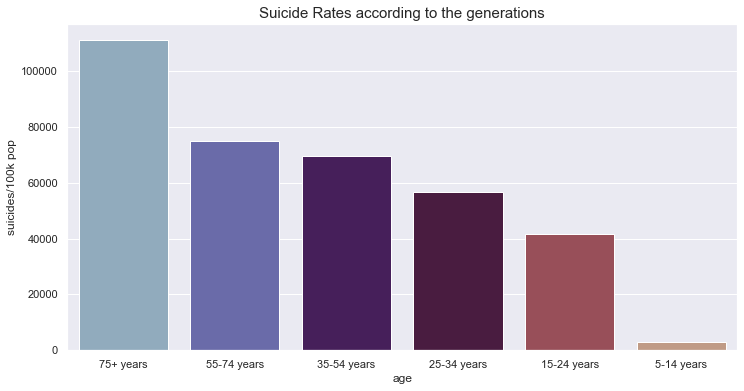

In [62]:
grouped_age = data_clean.groupby("age", as_index = False).sum().sort_values(by = 'suicides/100k pop', ascending = False)
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = 'age', y ='suicides/100k pop', data = grouped_age, palette=  "twilight")
plt.title("Suicide Rates according to the generations", fontsize = 15)
plt.show()

We can see that as the person gets older it tends to be more suicidal. This could be explained by the fact that important life changes that happen as we get older may cause feelings of uneasiness, stress, and sadness. But this might be due to the fact that old people (75+ years) belong to the G.I. Generation which already has the highest suicide rates. To further explore this we must check the number of people that commited suicide within each age category with respect to their generation. This way we can find out the distribution of ages of suicidal people within each generation. This will help us to identify if suicide is due to the age factor or to the generation.

## Modelling and Predictions

In [63]:
#Selecting the dependent and independent features
X = data_clean[['country', 'sex', 'population', 'age', 'gdp_per_capita ($)', 'generation']]
y = data_clean['suicides/100k pop']

As we know, the linear regression algorithm doesn't work with categorical features. To deal with this problem we'll need to transform our categorical data to dummy variables. For this we will use the Pandas method get_dummies.

In [64]:
#Transforming the categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


After dealing with categorical variables, we can move to scaling our data in order to normalise the data within a particular range.Also, scaling helps in speeding up the calculations in an algorithm.

In [65]:
from sklearn.preprocessing import StandardScaler 

In [66]:
#Scaling our data 
sc = StandardScaler()
X[['population', 'gdp_per_capita ($)']] = sc.fit_transform(X[['population', 'gdp_per_capita ($)']])

In [67]:
#Importing needed package for splitting the dataset
from sklearn.model_selection import train_test_split

Finally, we'll split our data into two sets: training and testing. The sizes will be 80% for the training data and 20% for testing data.

In [68]:
#Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

### Linear Regression

In [69]:
#Importing the Linear Regression algorithm 
from sklearn.linear_model import LinearRegression

#Initializing our Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicting the test values
lr_y_pred = lr.predict(X_test)

We saved the predictions in a variable named lr_y_pred. In order to compare them to the real values, we will plot them in the same figure. The values should be aligned on a 45° dergrees line.

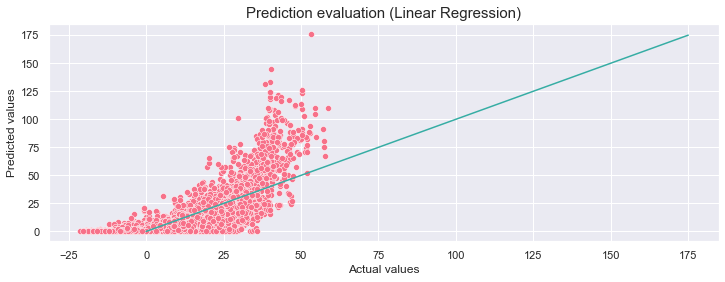

In [70]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(lr_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

Our model doesn't seem to be doing a good job, this might be due to fact that the features we selected aren't good enough, or it might be due the fact that the data we have isn't linear so a similar model won't be any good to estimate the values. Maybe the decision tree will perfom better, let's check it out.

### Decision Tree Regressor:
<br>
We will use exactly the same staps we did for the linear regression. First we'll import the tools from SkLearn

In [71]:
#Importing the Decision Tree algorithm 
from sklearn.tree import DecisionTreeRegressor

#Initializing our Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

#Predicting the test values
dt_y_pred = dt.predict(X_test)

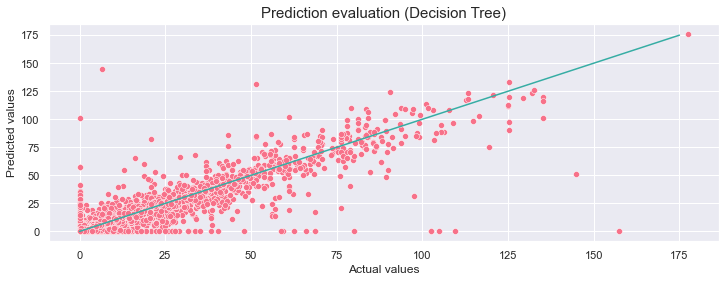

In [72]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(dt_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Decision Tree)', size=15)
plt.show()

The predictions are visibly much better than the one that the linear regression produced. Still we can't say that model produced good results. The decision tree needs further tuning in order to produce better results. Our data might also need more transformation or we might need more features in order to produce more accurate results.